In [1]:
# pyrates imports
from pyrates.ir.circuit import CircuitIR
from pyrates.backend import ComputeGraph
from pyrates.utility import plot_timeseries, grid_search
from pyrates.frontend import CircuitTemplate

# additional imports
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.reload_library()
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 28
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 28
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['legend.fontsize'] = 20
from copy import deepcopy

%matplotlib inline

In [2]:
# parameter and function definitions
dt = 1e-4
T = 2.
inp = np.random.randn(int(T/dt), 2) * 2.0

params = {'D': np.arange(0., 0.05, 0.01), 'C': np.arange(0.1, 1.0, 0.2)}
param_map = {'D': {'var': [(None, 'delay')],
                   'edges': [('PC1.0', 'PC2.0', 0), ('PC2.0', 'PC1.0', 0)]},
             'C': {'var': [(None, 'weight')],
                   'edges': [('PC1.0', 'PC2.0', 0), ('PC2.0', 'PC1.0', 0)]}
             }

In [3]:
# perform simulation
results = grid_search(circuit_template="pyrates.examples.simple_nextgen_NMM.Net6",
                      param_grid=params, param_map=param_map,
                      inputs={("PC", "Op_e.0", "inp"): inp}, outputs={"r": ("PC", "Op_e.0", "r")},
                      dt=dt, simulation_time=T, sampling_step_size=1e-3)

moving edge operators to nodes...
checking net config for consistency...
start of vectorization
...finished after 0.00786137580871582 seconds.


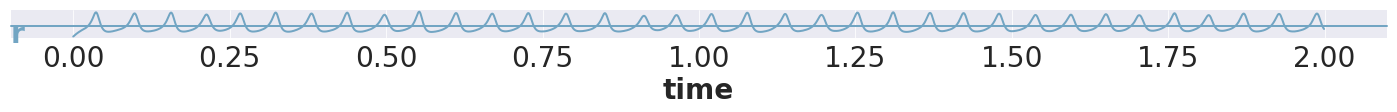

In [4]:
# plotting
plot_timeseries(results, plot_style='ridge_plot', demean=True, light=0.6, dark=0.3, hue=.95, n_colors=6, hspace=-.01,
                fontsize=28, start=-3.0, rot=-0.2, aspect=10, height=2.0)

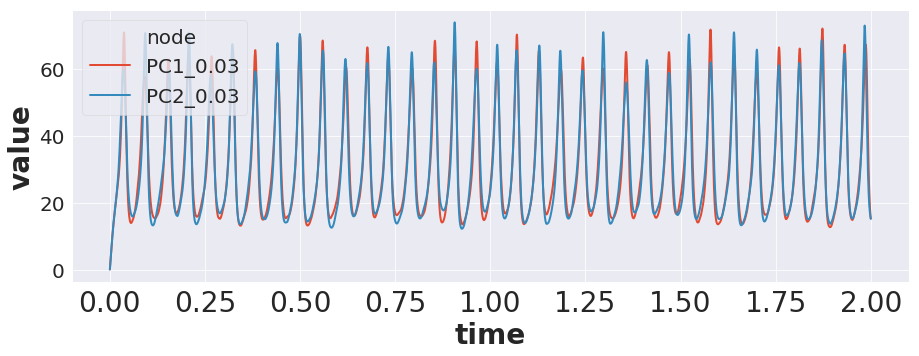

In [17]:
df = DataFrame()
d = D[3]
df[f'PC1_{d}'] = results[f"r1_d_{d}"]
df[f'PC2_{d}'] = results[f"r2_d_{d}"]
fig, axes = plt.subplots(figsize=(15,5))
plot_timeseries(df, ax=axes)

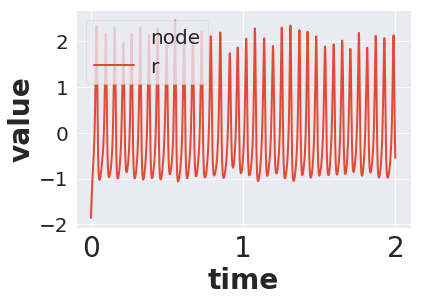

In [5]:
plot_timeseries(results)